In [ ]:
import pandas as pd

#Auxílio Reconstrução
O Auxílio Reconstrução é um apoio financeiro do governo federal no valor de R$ 5,1 mil para que as famílias possam repor itens perdidos nos desastres climáticos, como móveis, eletrodomésticos e utensílios; ou em pequenas reformas no imóvel residencial danificado pelas águas. As vítimas estão livres para usar o recurso da forma que achar mais adequada.

Até esta sexta-feira (12), cerca de 323,1 mil famílias de 125 municípios foram aprovadas no auxílio para recebimento do benefício, o que resultou no repasse feito pela União no valor de R$ 1,4 bilhão, nas contas dos responsáveis familiares da Caixa Econômica Federal.

O recurso financeiro está limitado a um recebimento por famílias afetadas e, devidamente cadastrada.

Ao todo, o Ministério da Integração e do Desenvolvimento Regional (MIDR) prevê o pagamento do Auxílio Reconstrução a 375 mil famílias, o que representa o investimento de R$ 1,9 bilhão.

Nesta análise vamos mostrar quantas pessoas receberam o auxilio, quantidade de valor disponibilizado por Município.

Data Abertos: https://portaldatransparencia.gov.br/download-de-dados-auxilio-reconstrucao

Dicionário de dados: https://portaldatransparencia.gov.br/pagina-interna/605621-dicionario-auxilio-reconstrucao

Dados Municipios: https://www.ibge.gov.br/cidades-e-estados/rs/


In [ ]:
csv = "202407_AuxilioReconstrucao.csv"

In [ ]:
# Supondo que você está lendo um arquivo CSV
# Use o encoding correto, por exemplo, 'latin1' ou 'iso-8859-1'

# Se for um arquivo Excel, use:
# df = pd.read_excel('seu_arquivo.xlsx', encoding='latin1')


df = pd.read_csv(csv, encoding='latin1',delimiter=';')

In [ ]:
df.tail()

,CPF,NOME,VALOR DISPONIBILIZADO,DATA DE PAGAMENTO,UF,NOME MUNICÍPIO
249414,***.123.570-**,LUCIMARA REZENDE DUTRA,"5100,00",01/07/2024,RS,CANOAS
249415,***.928.510-**,ANDRESSA FERREIRA RODRIGUES,"5100,00",11/06/2024,RS,CANOAS
249416,***.444.320-**,NATASHA MACHADO VARGAS,"5100,00",03/07/2024,RS,CANOAS
249417,***.560.200-**,GILBERTO DE CAMARGO,"5100,00",31/05/2024,RS,CANOAS
249418,***.700.360-**,YUSVELIS ANDREINA MORENO ODREMAN,"5100,00",06/06/2024,RS,CANOAS


In [ ]:
# Supondo que já temos o DataFrame "df" com a coluna "CPF"
# Removendo duplicatas para contar cada CPF apenas uma vez
total_pessoas = df['NOME'].nunique()

# Mostrando o total de pessoas que receberam o benefício
print(f'Total de pessoas que receberam o benefício do auxílio reconstrução: {total_pessoas}'.replace(',', '.'))

Total de pessoas que receberam o benefício do auxílio reconstrução: 243740


In [ ]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import folium
from folium.plugins import HeatMap

________________________________________________________________________________________________________________________________________________________________

#Valor do Beneficio por Municipio

In [ ]:
def grafico_valor_beneficio_municipio ():

  # Supondo que já temos o DataFrame "df" com as colunas "NOME MUNICÍPIO" e "VALOR DISPONIBILIZADO"

  # Convertendo a coluna 'VALOR DISPONIBILIZADO' para float
  df['Valor_Disponibilizado'] = df['VALOR DISPONIBILIZADO'].str.replace(',', '.').astype(float)

  # Agrupando por município e somando o valor disponibilizado
  Valor_por_Municipio = df.groupby('NOME MUNICÍPIO')['Valor_Disponibilizado'].sum().reset_index()

  # Ordenando a tabela de valor disponibilizado do maior para o menor
  Valor_por_Municipio = Valor_por_Municipio.sort_values(by='Valor_Disponibilizado', ascending=False)

  # Separando as top 10 cidades e agrupando as outras como "Outros"
  top_10_cidades = Valor_por_Municipio.head(10)
  restante = Valor_por_Municipio.iloc[10:]
  Valor_por_Municipio = pd.concat([top_10_cidades], ignore_index=True)

  # Classificando do menor para o maior para o gráfico de baixo para cima
  Valor_por_Municipio = Valor_por_Municipio.sort_values(by='Valor_Disponibilizado', ascending=True)

  # Calculando o percentual de auxílio das cidades específicas
  total_valor = Valor_por_Municipio['Valor_Disponibilizado'].sum()
  canoas_valor = Valor_por_Municipio[Valor_por_Municipio['NOME MUNICÍPIO'] == 'CANOAS']['Valor_Disponibilizado'].sum()
  porto_alegre_valor = Valor_por_Municipio[Valor_por_Municipio['NOME MUNICÍPIO'] == 'PORTO ALEGRE']['Valor_Disponibilizado'].sum()
  sao_leopoldo_valor = Valor_por_Municipio[Valor_por_Municipio['NOME MUNICÍPIO'] == 'SÃO LEOPOLDO']['Valor_Disponibilizado'].sum()

  percent_canoas = (canoas_valor / total_valor) * 100
  percent_porto_alegre = (porto_alegre_valor / total_valor) * 100
  percent_sao_leopoldo = (sao_leopoldo_valor / total_valor) * 100
  total_percent = percent_canoas + percent_porto_alegre + percent_sao_leopoldo

  # Visualização
  plt.figure(figsize=(14, 9))
  bars = plt.barh(Valor_por_Municipio['NOME MUNICÍPIO'], Valor_por_Municipio['Valor_Disponibilizado'] / 1e6, color='skyblue')

  # Mostrar os rótulos de dados no formato 'R$ {:.0f} M'
  for index, value in enumerate(Valor_por_Municipio['Valor_Disponibilizado']):
      plt.text(value / 1e6, index, f'R$ {value / 1e6:.0f} M', va='center')

  # Destacar as top 3 cidades
  for bar in bars[-3:]:  # Top 3 cidades, exceto 'Outros'
      bar.set_color(AQUA_1)

  # Remover linhas de grade do eixo x e y
  plt.grid(False, axis='both')

  # Adicionar título e rótulos dos eixos
  plt.title('Benefício por Município')
  plt.xlabel('Valor Benefício (R$ Milhões)')


  # Formatar o eixo x no formato 'R$ {:.0f} M'
  plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x:.0f} M'))

  # Adicionar texto explicativo na área do plot
  plt.text(120, 4, f'Total: {total_percent:.2f}% é representado por 3 cidades que estão em destaque,\n'
          f'isso significa que a quantidade de pessoas atingidas pelas enchentes\nmoravam nelas e os temporais foram devastadores.',
          fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

  # Exibir o gráfico
  plt.show()

  return plt

##Pagamento disponibilizado ao longo de julho

#Qtd de Pessoas que receberam por data

In [ ]:
def grafico_valor_recebido_data():

  # Supondo que já temos o DataFrame "df" com as colunas "DATA DE PAGAMENTO" e "VALOR DISPONIBILIZADO"
  # Convertendo a coluna 'VALOR DISPONIBILIZADO' para float
  df['Valor_Disponibilizado'] = df['VALOR DISPONIBILIZADO'].str.replace(',', '.').astype(float)

  # Convertendo a coluna 'DATA DE PAGAMENTO' para datetime
  df['DATA DE PAGAMENTO'] = pd.to_datetime(df['DATA DE PAGAMENTO'], format='%d/%m/%Y')

  # Agrupando por data de pagamento e somando o valor disponibilizado
  Valor_por_Data = df.groupby('DATA DE PAGAMENTO')['Valor_Disponibilizado'].sum().reset_index()

  # Ordenando a tabela de valor disponibilizado do menor para o maior
  Valor_por_Data = Valor_por_Data.sort_values(by='DATA DE PAGAMENTO', ascending=True)

  # Encontrando as três datas com os maiores valores disponibilizados
  top_3_datas = Valor_por_Data.nlargest(3, 'Valor_Disponibilizado')

  # Contando o total de pessoas que receberam o benefício do auxílio reconstrução
  total_pessoas = df['NOME'].nunique()

  # Visualização
  plt.figure(figsize=(15, 8))

  # Plotando a linha
  plt.plot(Valor_por_Data['DATA DE PAGAMENTO'], Valor_por_Data['Valor_Disponibilizado'] / 1e6, color='aqua', label='Valor Disponibilizado')

  # Destacando os pontos com os três maiores valores disponibilizados
  plt.scatter(top_3_datas['DATA DE PAGAMENTO'], top_3_datas['Valor_Disponibilizado'] / 1e6, color=AQUA_3, s=100, zorder=5)

  # Adicionando rótulos de dados nos pontos destacados
  for i in range(len(top_3_datas)):
      plt.text(top_3_datas['DATA DE PAGAMENTO'].iloc[i], top_3_datas['Valor_Disponibilizado'].iloc[i] / 1e6,
              f'R$ {top_3_datas["Valor_Disponibilizado"].iloc[i] / 1e6:.0f} M', fontsize=12, ha='right')

  # Formatar o eixo y no formato 'R$ {:.0f} M'
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x:.0f} M'))

  # Ajustar o limite do eixo y para mostrar até 400M
  plt.ylim(0, 400)

  # Adicionar título e rótulos dos eixos
  plt.title('Valor Disponibilizado por Data de Pagamento')
  plt.ylabel('Valor Disponibilizado (R$ Milhões)')

  # Melhorando a visualização das datas no eixo x
  plt.xticks(rotation=45)

  # Definindo o formato dos rótulos do eixo x para exibir todas as datas
  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

  # Adicionar texto explicativo na área do plot
  plt.text(0.40, 0.5, f'Podemos nortar os pagamentos foram realizados em varias datas\ndiferentes, mas 3 datas se destacaram pela quantidade de valores distribuidos.\nIsso significa que mais pessoas receberam o beneficio do \nauxilio reconstrução.\n\n Total de pessoas que receberam o benefício do auxílio reconstrução foram: {total_pessoas}',
          fontsize=12, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, ha='left')

  # Exibir o gráfico
  plt.tight_layout()
  plt.show()

  return plt


In [ ]:
def grafico_pessoas_por_recebimento_data():

  # Supondo que já temos o DataFrame "df" com as colunas 'DATA DE PAGAMENTO' e 'NOME'
  # Convertendo a coluna 'DATA DE PAGAMENTO' para o tipo datetime
  df['DATA DE PAGAMENTO'] = pd.to_datetime(df['DATA DE PAGAMENTO'], format='%d/%m/%Y')

  # Agrupando por data de pagamento e contando a quantidade de pessoas
  Valor_por_Data = df.groupby('DATA DE PAGAMENTO')['NOME'].nunique().reset_index()
  Valor_por_Data.columns = ['DATA DE PAGAMENTO', 'Quantidade_Pessoas']

  # Ordenando a tabela pela data de pagamento
  Valor_por_Data = Valor_por_Data.sort_values(by='DATA DE PAGAMENTO', ascending=True)

  # Encontrando as três datas com os maiores valores disponibilizados
  top_3_datas = Valor_por_Data.nlargest(3, 'Quantidade_Pessoas')

  # Visualização
  plt.figure(figsize=(15, 8))

  # Plotando o gráfico de barras
  # Convertendo as datas para strings para evitar a criação de muitos pontos no eixo x
  bars = plt.bar(Valor_por_Data['DATA DE PAGAMENTO'].dt.strftime('%d/%m/%Y'),
                Valor_por_Data['Quantidade_Pessoas'] / 1e3,
                color='skyblue',
                label='Qtd de Pessoas')

  # Destacando as barras com os três maiores valores disponibilizados
  top_3_indices = top_3_datas.index
  for i in top_3_indices:
      bars[i].set_color(AQUA_3)

  # Adicionando rótulos de dados em todos os pontos, um pouco acima das barras
  for i, row in Valor_por_Data.iterrows():
      plt.text(i, row['Quantidade_Pessoas'] / 1e3 + 1,
              f'{row["Quantidade_Pessoas"] / 1e3:.0f}K',
              fontsize=9, ha='center')

  # Adicionar título e rótulos dos eixos
  plt.title('Quantidade de Pessoas por Data de Pagamento')
  plt.ylabel('Quantidade de Pessoas (milhares)')
  plt.xlabel('Data de Pagamento')

  # Melhorando a visualização das datas no eixo x
  plt.xticks(rotation=45)

  # Formatar o eixo y para mostrar os dados em milhares
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}K'))

  # Ajustar layout
  plt.tight_layout()

  # Exibir o gráfico
  plt.show()

  return plt

#Construindo um mapa de calor para verificar qual Municipio Foi mais atingido em relação a quantidade de valores de benefíos atingidos

In [ ]:

def mapa_calor_estados_afetados():
  csv2 = 'municipios_RS.csv'

  # Supondo que já temos o DataFrame "df" com as colunas "NOME MUNICÍPIO" e "VALOR DISPONIBILIZADO"

  # Agrupando por município e somando o valor disponibilizado
  Valor_por_Municipio = df.groupby('NOME MUNICÍPIO')['Valor_Disponibilizado'].sum().reset_index()

  df2 = pd.read_csv(csv2, encoding='latin1',delimiter=',')

  # Supondo que as colunas estão presentes com esses nomes
  # Ajuste os nomes das colunas conforme necessário
  if 'Município' in df2.columns and 'latitude' in df2.columns and 'longitude' in df2.columns:
      # Filtrando as colunas desejadas
      df_filtrado = df2[['Município', 'latitude', 'longitude']]
      # Convertendo os nomes dos municípios para maiúsculas
      df_filtrado['Município'] = df_filtrado['Município'].str.upper()
  else:
      print("As colunas 'Município', 'latitude' e 'longitude' não foram encontradas. Verifique os nomes das colunas.")

  # Supondo que já temos o DataFrame "Valor_por_Municipio" com a coluna "Nome Municipio"
  # Convertendo os nomes dos municípios para maiúsculas para garantir a correspondência
  Valor_por_Municipio['NOME MUNICÍPIO'] = Valor_por_Municipio['NOME MUNICÍPIO'].str.upper()

  # Realizando o merge para adicionar latitude e longitude ao DataFrame Valor_por_Municipio
  Valor_por_Municipio_com_Localizacao = pd.merge(Valor_por_Municipio, df_filtrado, left_on='NOME MUNICÍPIO', right_on='Município', how='left')

  # Removendo a coluna duplicada 'Município' se necessário
  Valor_por_Municipio_com_Localizacao.drop(columns=['Município'], inplace=True)

  # Removendo a coluna duplicada 'Município' se necessário
  Valor_por_Municipio_com_Localizacao.drop(columns=['NOME MUNICÍPIO'], inplace=True)

  # Criando o mapa
  m = folium.Map(location=[-30.0346, -51.2177], zoom_start=7)

  # Adicionando o HeatMap
  heat_data = Valor_por_Municipio_com_Localizacao[['latitude', 'longitude', 'Valor_Disponibilizado']].dropna().values.tolist()
  HeatMap(heat_data).add_to(m)

  # Salvando o mapa em um arquivo HTML
  m.save('heatmap_valor_disponibilizado.html')

  # Exibindo o mapa
  m

  return m

In [ ]:
mapa_calor_estados_afetados()

<ipython-input-77-4c03c24e6c99>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Município'] = df_filtrado['Município'].str.upper()


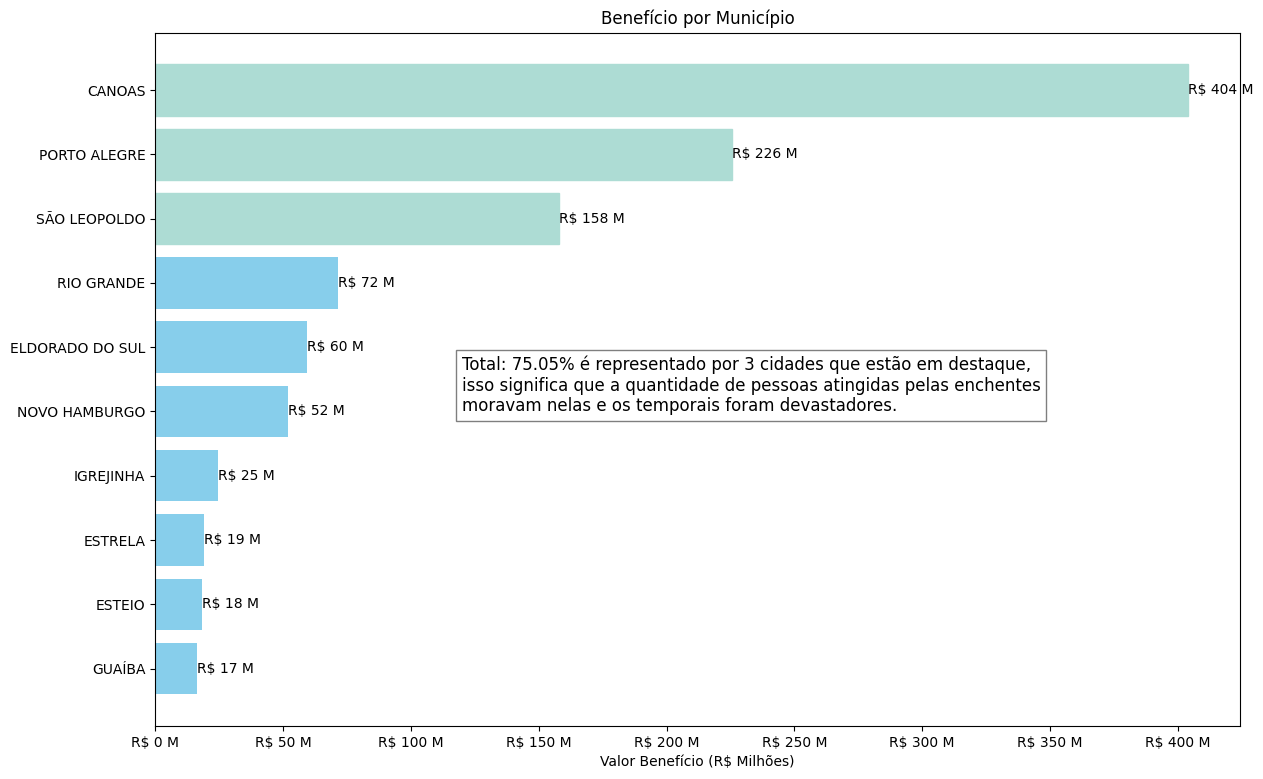

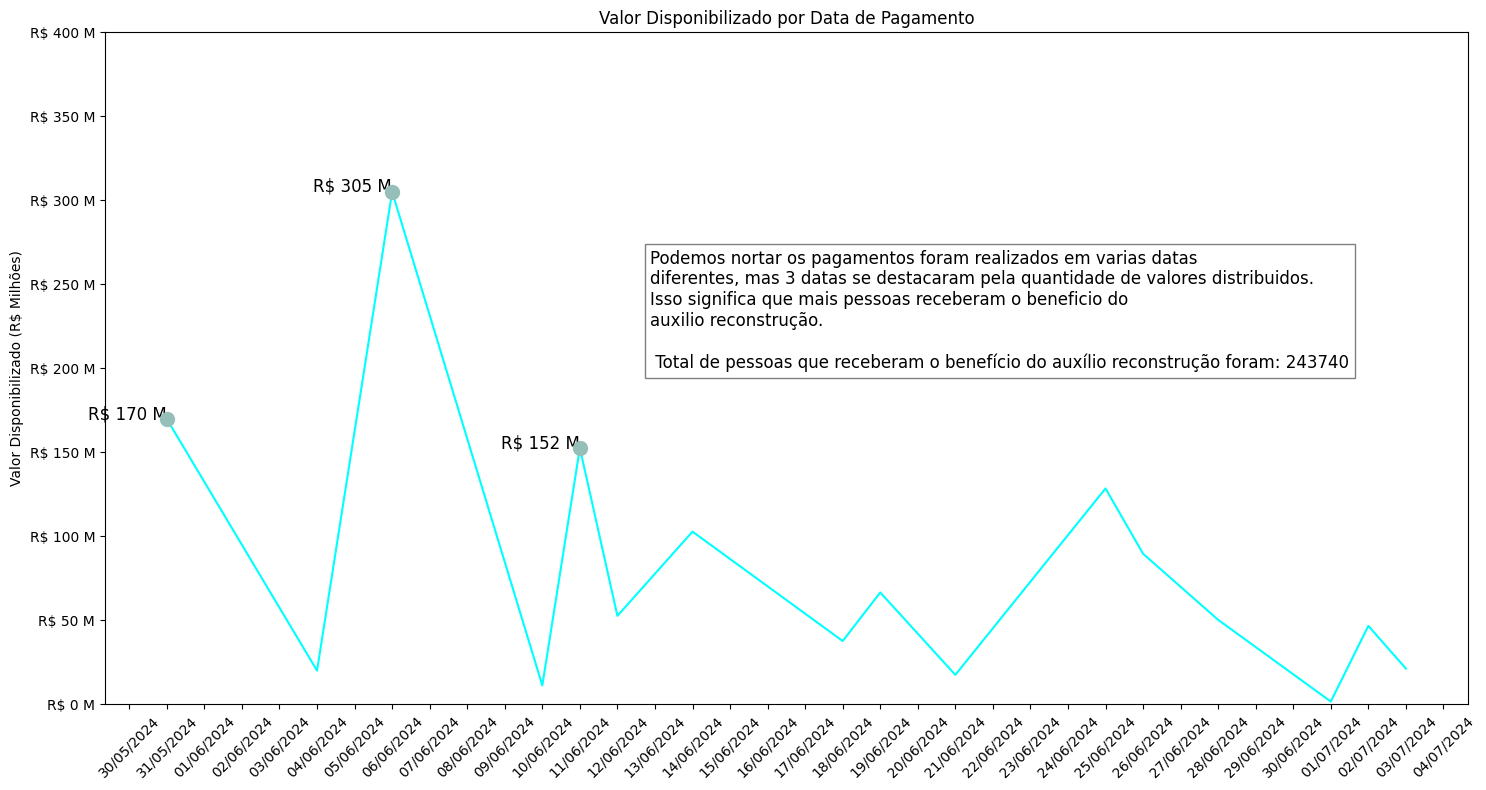

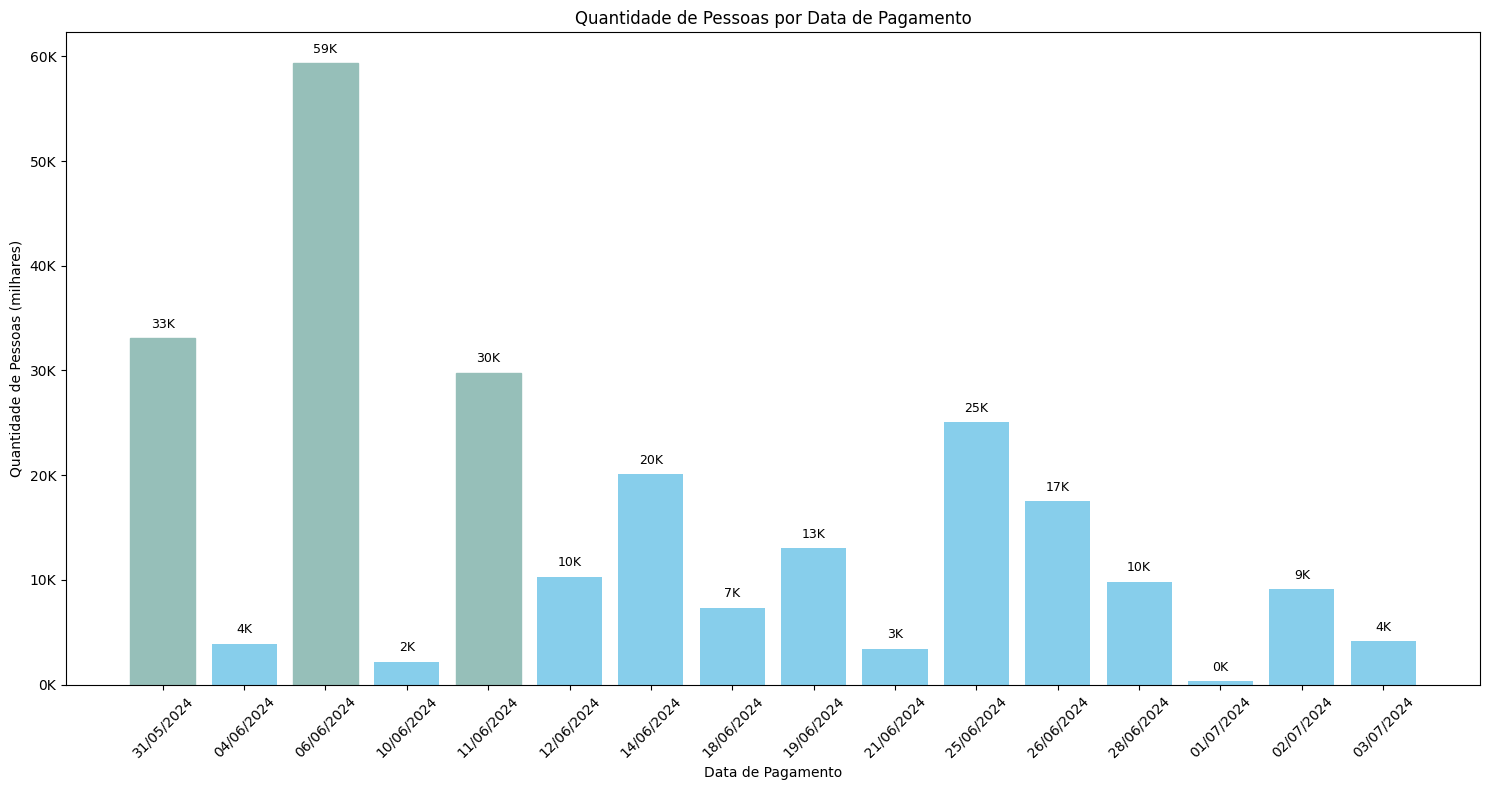

In [81]:
# Função para salvar os gráficos como imagens
def salvar_grafico(grafico, nome):
    imagem = grafico()
    imagem.savefig(f'{nome}.png', bbox_inches='tight')
    imagem.close()

# Salvando os gráficos
salvar_grafico(grafico_valor_beneficio_municipio, 'grafico_grafico_valor_beneficio_municipio')
salvar_grafico(grafico_valor_recebido_data, 'grafico_grafico_valor_recebido_data')
salvar_grafico(grafico_pessoas_por_recebimento_data, 'grafico_grafico_pessoas_por_recebimento_data')